# Import Statements

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Data Preprocessing

In [2]:
data = pd.read_csv('database.csv')
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [4]:
data.isna().sum() # Provide number of null values in a particular column

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [5]:
data.shape[0] # Provide the number of rows

23412

In [64]:
data = data.drop('ID', axis=1)

In [62]:
data.isna().sum() > 0.66 * data.shape[0] # Provide the number of column which contain more than 66% of missing value

Latitude            False
Longitude           False
Type                False
Depth               False
Magnitude           False
Magnitude Type      False
Root Mean Square    False
ID                  False
Source              False
Location Source     False
Magnitude Source    False
Status              False
Month               False
Year                False
Hour                False
dtype: bool

In [7]:
data.isna().mean() > 0.66 # Same syntax as above

Date                          False
Time                          False
Latitude                      False
Longitude                     False
Type                          False
Depth                         False
Depth Error                    True
Depth Seismic Stations         True
Magnitude                     False
Magnitude Type                False
Magnitude Error                True
Magnitude Seismic Stations     True
Azimuthal Gap                  True
Horizontal Distance            True
Horizontal Error               True
Root Mean Square              False
ID                            False
Source                        False
Location Source               False
Magnitude Source              False
Status                        False
dtype: bool

In [8]:
null_columns = data.loc[:, data.isna().mean() > 0.66].columns # Provide the name of columns which contain more than 66% of missing value
null_columns

Index(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error',
       'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance',
       'Horizontal Error'],
      dtype='object')

In [9]:
# data = data.drop(null_columns, axis=1) # Only need to run this syntax 1 time, where axis=1 means columns and axis=0 means rows

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23412 non-null  object 
 1   Time              23412 non-null  object 
 2   Latitude          23412 non-null  float64
 3   Longitude         23412 non-null  float64
 4   Type              23412 non-null  object 
 5   Depth             23412 non-null  float64
 6   Magnitude         23412 non-null  float64
 7   Magnitude Type    23409 non-null  object 
 8   Root Mean Square  17352 non-null  float64
 9   ID                23412 non-null  object 
 10  Source            23412 non-null  object 
 11  Location Source   23412 non-null  object 
 12  Magnitude Source  23412 non-null  object 
 13  Status            23412 non-null  object 
dtypes: float64(5), object(9)
memory usage: 2.5+ MB


In [11]:
# Fill NaN values of 'Root mean square' column with the mean value

data['Root Mean Square'] = data['Root Mean Square'].fillna(data['Root Mean Square'].mean())

In [12]:
data.isna().sum() # Provide number of null values in a particular column

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      3
Root Mean Square    0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [13]:
data = data.dropna(axis=0).reset_index(drop=True)

In [14]:
data.isna().sum() # Provide number of null values in a particular column

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
Root Mean Square    0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

# Feature Engineering

In [15]:
data

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,Reviewed
23405,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,Reviewed
23406,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,Reviewed
23407,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,Reviewed


In [16]:
data['Month'] = data['Date'].apply(lambda x: x[0:2]) # Create a new column called month
data['Year'] = data['Date'].apply(lambda x: x[-4:]) # Create a new column called year

data = data.drop('Date', axis=1) # drop the Date column

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23409 entries, 0 to 23408
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              23409 non-null  object 
 1   Latitude          23409 non-null  float64
 2   Longitude         23409 non-null  float64
 3   Type              23409 non-null  object 
 4   Depth             23409 non-null  float64
 5   Magnitude         23409 non-null  float64
 6   Magnitude Type    23409 non-null  object 
 7   Root Mean Square  23409 non-null  float64
 8   ID                23409 non-null  object 
 9   Source            23409 non-null  object 
 10  Location Source   23409 non-null  object 
 11  Magnitude Source  23409 non-null  object 
 12  Status            23409 non-null  object 
 13  Month             23409 non-null  object 
 14  Year              23409 non-null  object 
dtypes: float64(5), object(10)
memory usage: 2.7+ MB


In [24]:
# data['Month'] = data['Month'].astype(np.int64)
# data['Year'] = data['Year'].astype(np.int64)


In [19]:
# To solve above error 
data[data['Year'].str.contains('Z')]

,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Year
3378,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6,MB,1.022784,USP0000A09,US,US,US,Reviewed,19,000Z
7510,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6,MW,1.300000,USP0002E81,US,US,HRV,Reviewed,19,530Z
20647,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8,MWC,1.060000,USP000HWQP,US,US,GCMT,Reviewed,20,520Z


In [21]:
invalid_year_indices = data[data['Year'].str.contains('Z')].index
data = data.drop(invalid_year_indices,axis=0)

In [22]:
data['Month'] = data['Month'].astype(np.int64)
data['Year'] = data['Year'].astype(np.int64)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23406 entries, 0 to 23408
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              23406 non-null  object 
 1   Latitude          23406 non-null  float64
 2   Longitude         23406 non-null  float64
 3   Type              23406 non-null  object 
 4   Depth             23406 non-null  float64
 5   Magnitude         23406 non-null  float64
 6   Magnitude Type    23406 non-null  object 
 7   Root Mean Square  23406 non-null  float64
 8   ID                23406 non-null  object 
 9   Source            23406 non-null  object 
 10  Location Source   23406 non-null  object 
 11  Magnitude Source  23406 non-null  object 
 12  Status            23406 non-null  object 
 13  Month             23406 non-null  int64  
 14  Year              23406 non-null  int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 2.9+ MB


In [26]:
data['Hour'] = data['Time'].apply(lambda x: np.int64(x[0:2])) # Create a new column called Hour

In [29]:
data = data.drop('Time', axis=1) # drop the Time column
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23406 entries, 0 to 23408
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          23406 non-null  float64
 1   Longitude         23406 non-null  float64
 2   Type              23406 non-null  object 
 3   Depth             23406 non-null  float64
 4   Magnitude         23406 non-null  float64
 5   Magnitude Type    23406 non-null  object 
 6   Root Mean Square  23406 non-null  float64
 7   ID                23406 non-null  object 
 8   Source            23406 non-null  object 
 9   Location Source   23406 non-null  object 
 10  Magnitude Source  23406 non-null  object 
 11  Status            23406 non-null  object 
 12  Month             23406 non-null  int64  
 13  Year              23406 non-null  int64  
 14  Hour              23406 non-null  int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 2.9+ MB


In [40]:
data['Status'].unique()

array(['Automatic', 'Reviewed'], dtype=object)

In [41]:
data['Status'] = data['Status'].apply(lambda x : 1 if x == 'Reviewed' else 0)

In [42]:
data['Status'].unique()

array([0, 1], dtype=int64)

# Visualization

In [43]:
numeric_columns = [column for column in data.columns if data.dtypes[column] != 'object'] # Fetch all int columns

In [44]:
corr = data[numeric_columns].corr()
corr

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Year,Hour
Latitude,1.000000,0.203719,-0.081023,0.035041,-0.182055,-0.101115,-0.005717,-0.076320,-0.010094
Longitude,0.203719,1.000000,-0.086118,0.038517,-0.024234,-0.041748,-0.008631,-0.037585,-0.014265
Depth,-0.081023,-0.086118,1.000000,0.023558,-0.119180,0.003618,0.002021,-0.023798,0.010554
Magnitude,0.035041,0.038517,0.023558,1.000000,0.065079,-0.103882,0.001095,-0.032087,0.004433
Root Mean Square,-0.182055,-0.024234,-0.119180,0.065079,1.000000,-0.000029,-0.001732,-0.147406,0.005491
Status,-0.101115,-0.041748,0.003618,-0.103882,-0.000029,1.000000,0.006995,0.576036,0.003976
Month,-0.005717,-0.008631,0.002021,0.001095,-0.001732,0.006995,1.000000,-0.004662,0.005245
Year,-0.076320,-0.037585,-0.023798,-0.032087,-0.147406,0.576036,-0.004662,1.000000,0.001814
Hour,-0.010094,-0.014265,0.010554,0.004433,0.005491,0.003976,0.005245,0.001814,1.000000


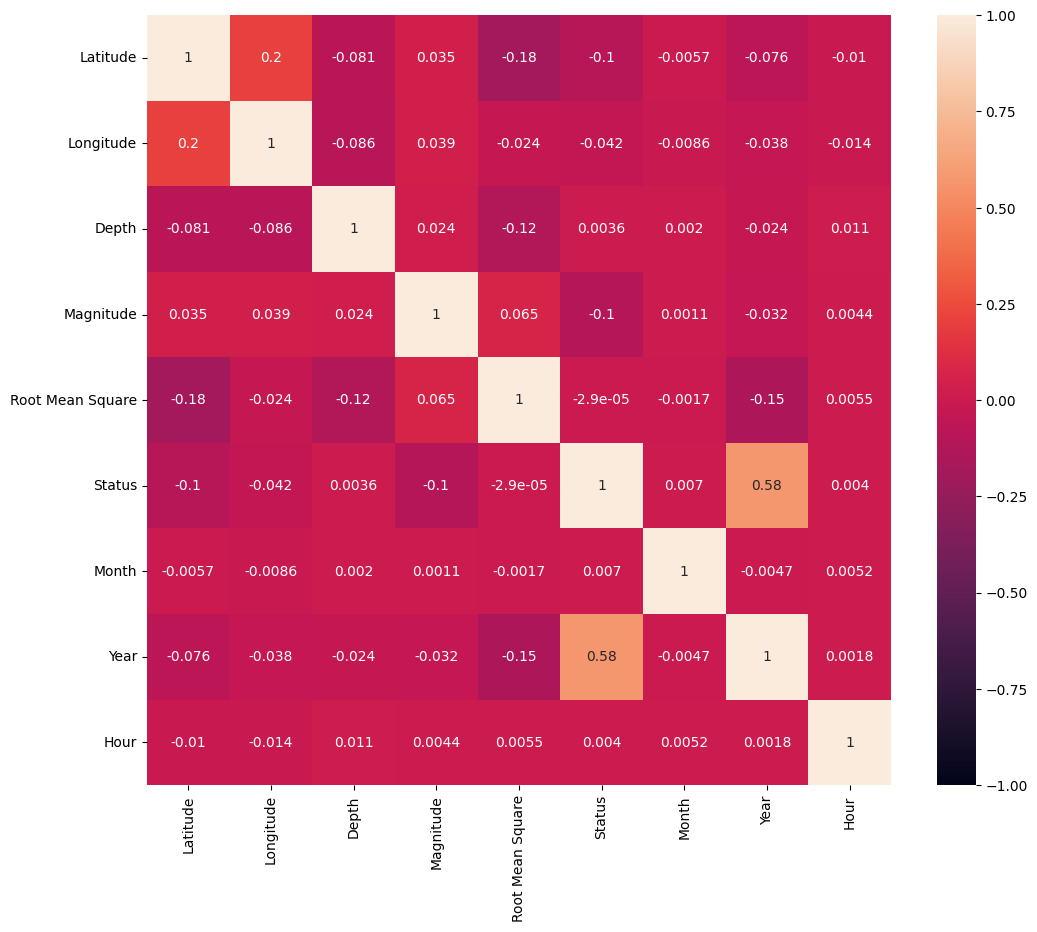

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [46]:
numeric_columns.remove('Status')

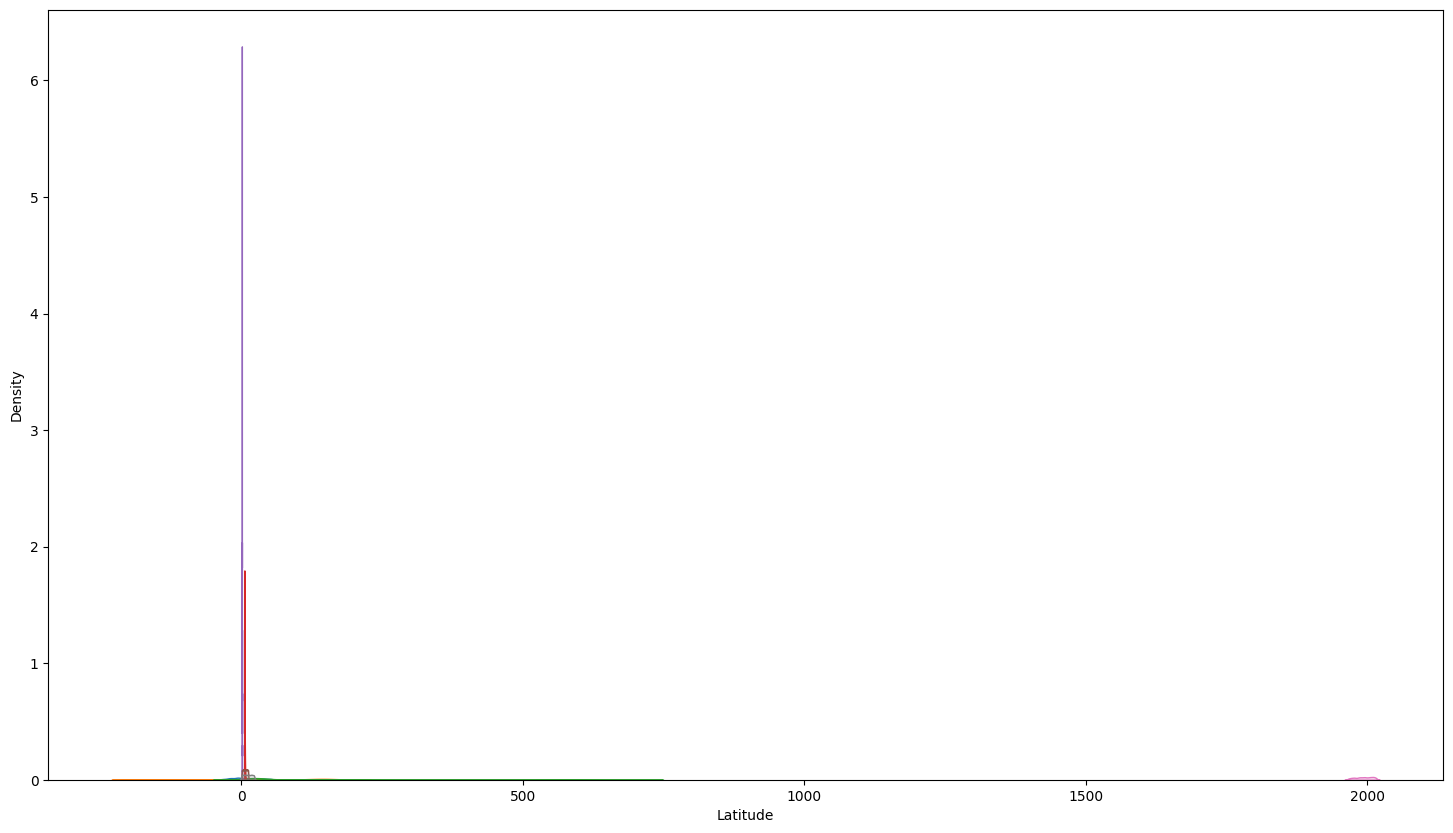

In [49]:
plt.figure(figsize=(18,10))
for column in numeric_columns:
    sns.kdeplot(data[column], fill=True)
plt.show()

In [50]:
scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(data[numeric_columns].copy()), columns = numeric_columns)

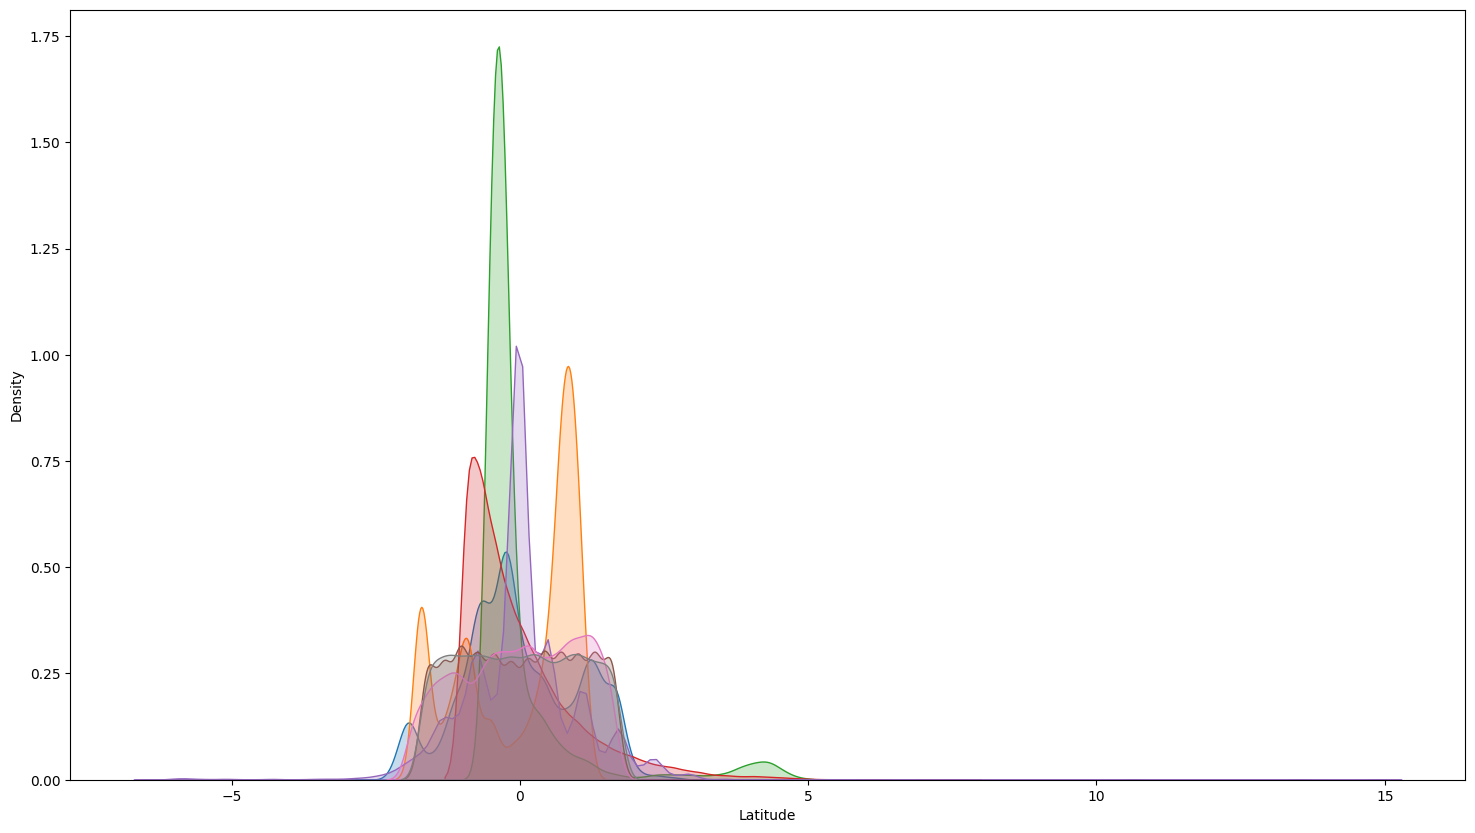

In [51]:
plt.figure(figsize=(18,10))
for column in numeric_columns:
    sns.kdeplot(standardized_df[column], fill=True)
plt.show()

# Encoding

In [52]:
data['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [58]:
# pd.get_dummies(data['Type'], prefix='TYPE')

In [68]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [69]:
data = onehot_encode(data, ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source'],
                     ['t', 'mt','s', 'ls','ms'])

In [70]:
data

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Year,Hour,t_Earthquake,...,ms_NN,ms_OFFICIAL,ms_PAR,ms_PGC,ms_PR,ms_SE,ms_US,ms_US_GCMT,ms_US_PGC,ms_UW
0,19.2460,145.6160,131.60,6.0,1.022784,0,1,1965,13,True,...,False,False,False,False,False,False,False,False,False,False
1,1.8630,127.3520,80.00,5.8,1.022784,0,1,1965,11,True,...,False,False,False,False,False,False,False,False,False,False
2,-20.5790,-173.9720,20.00,6.2,1.022784,0,1,1965,18,True,...,False,False,False,False,False,False,False,False,False,False
3,-59.0760,-23.5570,15.00,5.8,1.022784,0,1,1965,18,True,...,False,False,False,False,False,False,False,False,False,False
4,11.9380,126.4270,15.00,5.8,1.022784,0,1,1965,13,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,38.3917,-118.8941,12.30,5.6,0.189800,1,12,2016,8,True,...,True,False,False,False,False,False,False,False,False,False
23405,38.3777,-118.8957,8.80,5.5,0.218700,1,12,2016,9,True,...,True,False,False,False,False,False,False,False,False,False
23406,36.9179,140.4262,10.00,5.9,1.520000,1,12,2016,12,True,...,False,False,False,False,False,False,True,False,False,False
23407,-9.0283,118.6639,79.00,6.3,1.430000,1,12,2016,22,True,...,False,False,False,False,False,False,True,False,False,False


# Splitting and Scaling

In [71]:
y = data.loc[:, 'Status']
X = data.drop('Status', axis=1)

In [72]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=47)

# Modelling and Training

In [74]:
X.shape

(23406, 104)

In [76]:
y.mean() # 88% Status is "Reviewed"

0.88737930445185

In [83]:
inputs = tf.keras.Input(shape=(104,))
x1 = tf.keras.layers.Dense(64, activation='relu')(inputs)
x2 = tf.keras.layers.Dense(64, activation='relu')(x1)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x2)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

batch_size = 32
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size, 
    epochs = epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)
    

# Results

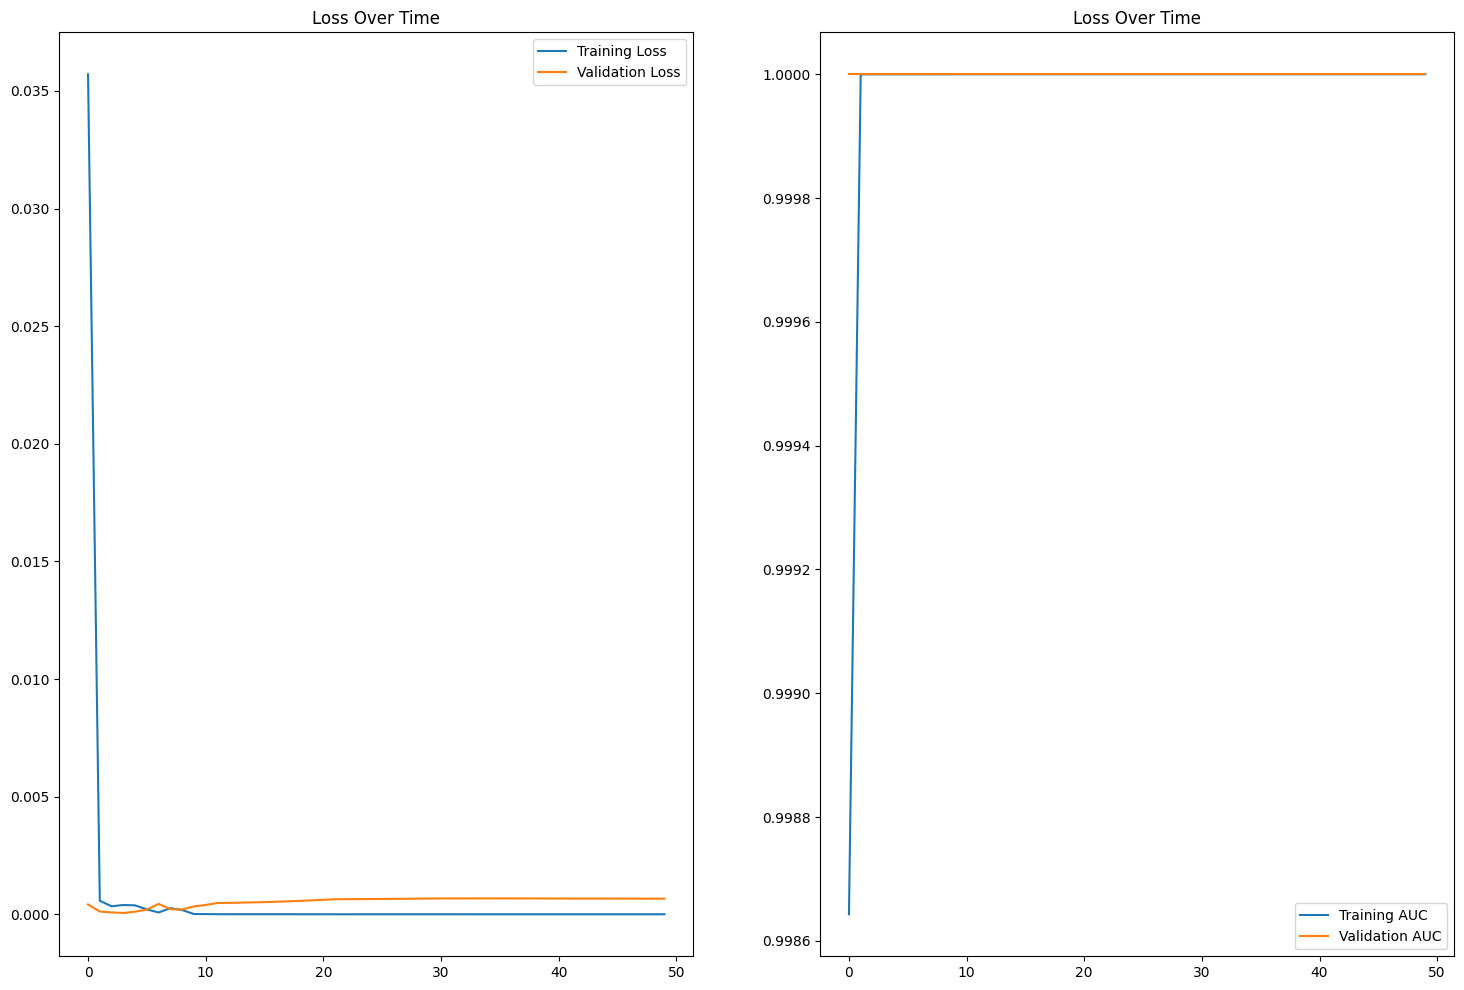

In [84]:
plt.figure(figsize=(18,12))

epochs_range = range(epochs)
train_loss, val_loss = history.history['loss'],  history.history['val_loss']
train_auc, val_auc = history.history['auc'],  history.history['val_auc']

plt.subplot(1,2,1)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend()
plt.title("Loss Over Time")

plt.subplot(1,2,2)
plt.plot(epochs_range, train_auc, label="Training AUC")
plt.plot(epochs_range, val_auc, label="Validation AUC")
plt.legend()
plt.title("Loss Over Time")

plt.show()

# Testing

In [85]:
model.evaluate(X_test, y_test)

220/220 [==============================] - 0s 836us/step - loss: 2.3182e-04 - auc: 1.0000


[0.00023182448057923466, 1.0]